In [53]:
# 사용할 데이터의 형태
data_type = '17'      # '1' : summarize X,개별 기사   '2' : summarize X,날짜별 기사
                    # '3' : summarize O,개별 기사   '4' : summarize O,날짜별 기사
normalized = 'done' # 'done' : 데이터 행별 normalize한 데이터     'not' : 데이터 행별 normalize 안한 데이터
erased_word = ''    # 제거된 단어 형태
num_word = '6000'   # 사용할 단어 수

# 돌려볼 모델의 구조
first_layer = 3000   # 모델의 첫 번째 레이어 수
second_layer = 1000  # 모델의 두 번째 레이어 수
ep = 60             # 모델의 에포크 수
ba = 1024            # 모델의 배치 사이즈

In [15]:
# 생성된 training, test의 x,y값을 pickle의 형태로 저장
import pickle
import os
path = os.getcwd()+'/pickles/'
if erased_word != '':
    erased_word = '_'+erased_word
with open(path+data_type+'train_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train_x = pickle.load(f)
with open(path+data_type+'train_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train_y = pickle.load(f)
with open(path+data_type+'train2_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train2_x = pickle.load(f)
with open(path+data_type+'train2_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train2_y = pickle.load(f)
with open(path+data_type+'test_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test_x = pickle.load(f)
with open(path+data_type+'test_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test_y = pickle.load(f)
with open(path+data_type+'test2_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test2_x = pickle.load(f)
with open(path+data_type+'test2_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test2_y = pickle.load(f)

In [16]:
# numpy 사용하여 float로 바꾸어주는 과정
import numpy as np
x_train = np.asarray(train_x).astype('float32')
y_train = np.asarray(train_y).astype('float32')
x_test = np.asarray(test_x).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [17]:
# DNN 학습 모델
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint


callbacks = [ModelCheckpoint(filepath='bestModel',monitor='val_categorical_accuracy',save_best_only=True)]
model = models.Sequential()
n =len(x_train[0])
model.add(layers.Dense(first_layer,activation='relu'))#실제 쓸 단어갯수

model.add(layers.Dense(second_layer,activation='relu'))

model.add(layers.Dense(3,activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss = losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])

hist = model.fit(x_train,y_train,epochs=ep,validation_data=(x_test,y_test),callbacks=callbacks,batch_size=ba)
#hist = model.fit(x_train,y_train,epochs=ep,validation_data=(x_test,y_test),batch_size=ba)

# 모델의 예측값을 튜플로 반환하는 함수
def predict(x):
    data = np.expand_dims(np.asarray(x).astype('float32'),axis=0)
    result = model.predict(data)
    return tuple(result[0])


Epoch 1/60
5/5 [==============================] - 3s 506ms/step - loss: 1.0978 - categorical_accuracy: 0.3561 - val_loss: 1.0929 - val_categorical_accuracy: 0.3835
Epoch 2/60
5/5 [==============================] - 3s 510ms/step - loss: 1.0890 - categorical_accuracy: 0.3843 - val_loss: 1.0851 - val_categorical_accuracy: 0.3889
Epoch 3/60
5/5 [==============================] - 2s 488ms/step - loss: 1.0731 - categorical_accuracy: 0.3798 - val_loss: 1.0720 - val_categorical_accuracy: 0.4283
Epoch 4/60
5/5 [==============================] - 3s 518ms/step - loss: 1.0924 - categorical_accuracy: 0.3966 - val_loss: 1.0643 - val_categorical_accuracy: 0.4498
Epoch 5/60
5/5 [==============================] - 2s 331ms/step - loss: 1.0331 - categorical_accuracy: 0.4368 - val_loss: 1.0529 - val_categorical_accuracy: 0.4409
Epoch 6/60
5/5 [==============================] - 2s 376ms/step - loss: 1.0010 - categorical_accuracy: 0.4899 - val_loss: 1.1206 - val_categorical_accuracy: 0.3315
Epoch 7/60
5/5 [

5/5 [==============================] - 2s 386ms/step - loss: 0.2565 - categorical_accuracy: 0.9158 - val_loss: 1.3090 - val_categorical_accuracy: 0.5842
Epoch 40/60
5/5 [==============================] - 2s 373ms/step - loss: 0.2203 - categorical_accuracy: 0.9348 - val_loss: 1.2716 - val_categorical_accuracy: 0.5932
Epoch 41/60
5/5 [==============================] - 2s 374ms/step - loss: 0.3024 - categorical_accuracy: 0.8749 - val_loss: 1.3103 - val_categorical_accuracy: 0.5538
Epoch 42/60
5/5 [==============================] - 2s 368ms/step - loss: 0.2485 - categorical_accuracy: 0.9169 - val_loss: 1.4385 - val_categorical_accuracy: 0.5072
Epoch 43/60
5/5 [==============================] - 2s 359ms/step - loss: 0.2406 - categorical_accuracy: 0.9120 - val_loss: 1.2675 - val_categorical_accuracy: 0.5950
Epoch 44/60
5/5 [==============================] - 2s 358ms/step - loss: 0.2122 - categorical_accuracy: 0.9176 - val_loss: 1.7082 - val_categorical_accuracy: 0.4928
Epoch 45/60
5/5 [=====

In [18]:
model_best = models.load_model('bestModel')

def b_predict(x):
    data = np.expand_dims(np.asarray(x).astype('float32'),axis=0)
    result = model_best.predict(data)
    return tuple(result[0])

In [6]:
# 모든 날짜의 예측값들을 합치기 위한 튜플의 합 함수

def sum_tuple(a,b):
    return (a[0]+b[0],a[1]+b[1],a[2]+b[2])

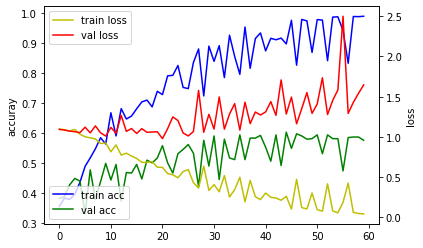

In [19]:
#8
%matplotlib inline
import matplotlib.pyplot as plt

fig, acc_ax = plt.subplots()

loss_ax = acc_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['categorical_accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_categorical_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [20]:
# Test set에 대한 예측 및 예측 정확도의 계산
#money190101을 트레이닝으로 삼은 모델로 final_maekyung190101예측결과) 0.0077 -0.005
#optimizer :RMSprop
import re
print('데이터 타입 : '+data_type)
print('단어 갯수 : '+num_word)
print('행당 노말라이즈 : '+ normalized)
print('모델 레이어 및 노드 수 : ','첫 번째 레이어 - relu,',first_layer,', 두 번째 레이어 - relu,',second_layer)
print('epochs : ',ep,', batch_size : ', ba)

count = 0
sum_dic = {}
for data in test2_x:
    result = b_predict(data[0])
    if data[1] in sum_dic:
        sum_dic[data[1]] = sum_tuple(sum_dic[data[1]],result)
    else:
        sum_dic[data[1]] = result
    
for date in sum_dic:
    real = test2_y[date]
    value = sum_dic[date].index(max(sum_dic[date]))
    value -= 1
    if real == value:
        count = count + 1
test_score = count / len(sum_dic)


#print('train 데이터 정확도 : ', train_score)
print('test 데이터 정확도 : ', test_score)

데이터 타입 : 17
단어 갯수 : 6000
행당 노말라이즈 : done
모델 레이어 및 노드 수 :  첫 번째 레이어 - relu, 3000 , 두 번째 레이어 - relu, 1000
epochs :  60 , batch_size :  1024
test 데이터 정확도 :  0.7894736842105263
